#Library

We download some libraries that are important and necessary in out proejct

In [ ]:
import cv2
import numpy as np
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import csv
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skimage.io
import skimage.transform
import skimage.exposure
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
!pip install imageio[pyav]

#Read Path

We read images file from DRIVE then put images' name and path into two lists

In [ ]:
image_dir_real = '/content/drive/MyDrive/real'
image_dir_fake = '/content/drive/MyDrive/fake'
out_dir = '/content/drive/MyDrive/resized_image'

In [ ]:
if not os.path.exists(out_dir):
  os.makedirs(out_dir)

In [ ]:
real_image_name = []
real_path_file = []
for file_name in os.listdir(image_dir_real):
  real_image_name.append(file_name)
  path = '/content/drive/MyDrive/real/'+file_name
  real_path_file.append(path)


In [ ]:
fake_image_name = []
fake_path_file = []
for file_name in os.listdir(image_dir_fake):
  fake_image_name.append(file_name)
  path = '/content/drive/MyDrive/fake/'+file_name
  fake_path_file.append(path)


Let's check whether our code will be ran without any problem or not

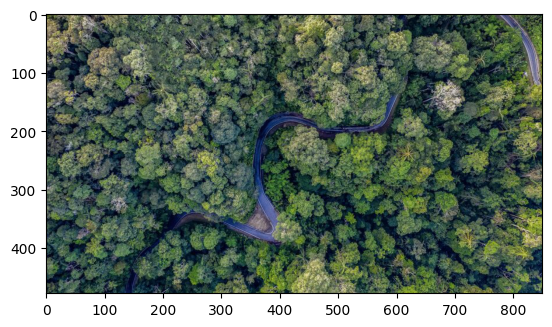

In [ ]:
im = skimage.io.imread(real_path_file[0])
fig,ax = plt.subplots()
ax.imshow(im)

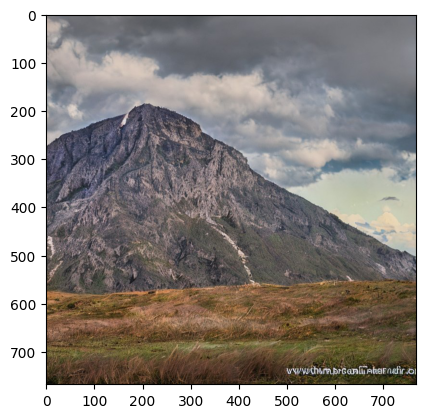

In [ ]:
im = skimage.io.imread(fake_path_file[0])
fig,ax = plt.subplots()
ax.imshow(im)

#Combine Real and Fake images

We combine all fake and real images into one file is called 'orginal_image'

In [ ]:
org_dir = '/content/drive/MyDrive/orginal_image'
if not os.path.exists(org_dir):
  os.makedirs(org_dir)

In [ ]:
org_image_name = []
org_path_file = []
for file_name in os.listdir(org_dir):
  org_image_name.append(file_name)
  path = '/content/drive/MyDrive/orginal_image/'+file_name
  org_path_file.append(path)

In [ ]:
from PIL import Image

def merge_images(inpath, image_name, org_dir = org_dir):
    image_path = os.path.join(inpath)

    try:
        image = Image.open(image_path)
    except IOError:
        print(f"Error loading image: {image_name}")
        return None

    if image.mode == 'RGBA' or image.mode == 'P':
      image = image.convert('RGB')
    # Resize image
    # resized_image = image.resize(target_size)

    # Convert image format to JPG
    output_filename = os.path.splitext(image_name)[0] + '.jpg'
    output_path = os.path.join(org_dir, output_filename)
    image.save(output_path, 'JPEG')

for path,name in list(zip(real_path_file,real_image_name)):
  merge_images(path,name)

Error loading image: 810199515_real_none_jungle_1.jpeg
Error loading image: 810199515_real_none_jungle_10.jpeg


In [ ]:
for path,name in list(zip(fake_path_file,fake_image_name)):
  merge_images(path,name)

#Pre Processing

This code snippet performs pre-processing on images using the PIL (Python Imaging Library) library. Here's a breakdown of what the code does:

1. `from PIL import Image`: This line imports the `Image` module from the PIL library, which provides image processing functionality.

2. `def pre_processing(inpath, image_name, out_dir = out_dir):`: This line defines a function named `pre_processing` that takes three parameters: `inpath` (input path of the image), `image_name` (name of the image file), and `out_dir` (output directory for the processed images, with a default value of `out_dir`).

3. `image_path = os.path.join(inpath)`: This line joins the input path and the image name to create the complete path to the image file.

4. `try...except IOError`: This block of code attempts to open the image file using the `Image.open()` function. If an `IOError` occurs, indicating that the image file couldn't be loaded, an error message is printed and `None` is returned.

5. `if image.mode == 'RGBA' or image.mode == 'P': image = image.convert('RGB')`: This line checks if the image mode is either RGBA (with transparency) or P (indexed palette). If so, the image is converted to RGB mode using the `convert()` method.

6. `resized_image = image.resize(target_size)`: This line resizes the image to the desired target size specified elsewhere in the code. The `resize()` method is used, and the resized image is stored in the `resized_image` variable.

7. `output_filename = os.path.splitext(image_name)[0] + '.jpg'`: This line extracts the base filename (without extension) from the `image_name` and appends the '.jpg' extension to create the output filename.

8. `output_path = os.path.join(out_dir, output_filename)`: This line joins the output directory path (`out_dir`) with the output filename to create the complete output path for the processed image.

9. `resized_image.save(output_path, 'JPEG')`: This line saves the resized image in JPEG format at the specified output path using the `save()` method.

10. `return`: This line returns from the function.

11. The last part of the code uses a loop to iterate over a list of image paths (`real_path_file`) and image names (`real_image_name`). For each pair of path and name, it calls the `pre_processing()` function to perform the pre-processing on the image.

Overall, the code takes an input image, opens it using PIL, performs resizing and format conversion, and saves the processed image in JPEG format to the specified output directory. The loop allows processing multiple images by iterating over their paths and names.

In [ ]:
target_size = (224,224)

In [ ]:
from PIL import Image

def pre_processing(inpath, image_name, out_dir = out_dir):
    image_path = os.path.join(inpath)

    try:
        image = Image.open(image_path)
    except IOError:
        print(f"Error loading image: {image_name}")
        return None

    if image.mode == 'RGBA' or image.mode == 'P':
      image = image.convert('RGB')
    # Resize image
    resized_image = image.resize(target_size)

    # Convert image format to JPG
    output_filename = os.path.splitext(image_name)[0] + '.jpg'
    output_path = os.path.join(out_dir, output_filename)
    resized_image.save(output_path, 'JPEG')


    return



for path,name in list(zip(real_path_file,real_image_name)):
  pre_processing(path,name)


Error loading image: 810199515_real_none_jungle_1.jpeg
Error loading image: 810199515_real_none_jungle_10.jpeg


In [ ]:
for path,name in list(zip(fake_path_file,fake_image_name)):
  pre_processing(path,name)


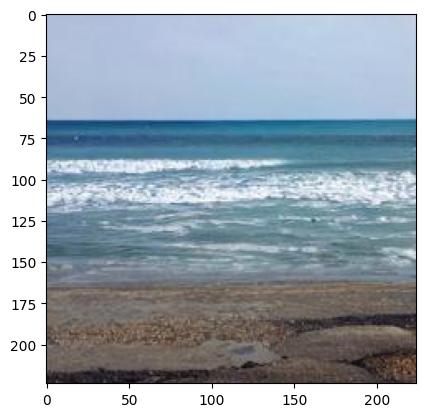

In [ ]:
file_name = out_dir + '/' + os.listdir(out_dir)[2340]
im = skimage.io.imread(file_name)
fig,ax = plt.subplots()
ax.imshow(im)

We also make a resied_image folder
in this file there are all images that are resized

In [ ]:
resized_image_dir = '/content/drive/MyDrive/resized_image'

In [ ]:
resized_image_name = []
resized_path_file = []
for file_name in os.listdir(resized_image_dir):
  resized_image_name.append(file_name)
  path = '/content/drive/MyDrive/resized_image/'+file_name
  resized_path_file.append(path)

#Labels

We create labels from resized images and then put into two files as csv

In [ ]:
labels_binary = {}
key = 0
for name in resized_image_name:
  if 'real' in name or 'Real' in name:
    labels_binary[key] = 0
  if 'fake' in name or 'Fake' in name:
    labels_binary[key] = 1
  key +=1

In [ ]:
csv_file_path = 'labels_binary.csv'

# Open the CSV file in write mode
with open(csv_file_path, mode='w', newline='') as lable:
    writer = csv.writer(lable)

    # Write the header row
    writer.writerow(['Index', 'Label'])

    # Write the data rows
    for key, label in labels_binary.items():
        writer.writerow([key, label])

print(f"Labels saved to {csv_file_path} successfully.")

Labels saved to labels_binary.csv successfully.


In [ ]:
labels_multi = {}
i = 0
for name in resized_image_name:
  if 'mountain' in name or 'Mountain' in name:
    labels_multi[i] = 0
  if 'jungle' in name or 'Jungle' in name or 'forest' in name or 'junlge' in name:
    labels_multi[i] = 1
  if 'sea' in name or 'Sea' in name or 'see' in name:
    labels_multi[i] = 2
  i +=1

In [ ]:
csv_file_path = 'labels_multi.csv'

# Open the CSV file in write mode
with open(csv_file_path, mode='w', newline='') as lable:
    writer = csv.writer(lable)

    # Write the header row
    writer.writerow(['Index', 'Label'])

    # Write the data rows
    for key, label in labels_multi.items():
        writer.writerow([key, label])

print(f"Labels saved to {csv_file_path} successfully.")

Labels saved to labels_multi.csv successfully.


# Feature Extraction

Now it's time to do the one of the most importan parts in our project

##Histogram of Oriented Gradients

The Histogram of Oriented Gradients (HOG) is a popular feature extraction method used in computer vision and image processing. It is particularly effective in object detection and recognition tasks.

The basic idea behind HOG is to capture the local shape and texture information of an image by analyzing the distribution of gradient orientations. The method calculates the gradients (i.e., the rate of intensity change) in an image and divides it into small regions called cells. For each cell, the gradient orientations are quantized into a set of predefined bins. The magnitude of the gradients is used to accumulate votes into the corresponding orientation bins.

To capture spatial information, the cells are grouped into larger blocks, and the histogram of gradient orientations is computed for each block. This creates a descriptor that represents the distribution of local gradients in the image. The resulting HOG descriptor encodes both the shape and texture information of the image, making it robust to changes in illumination and other variations.

HOG is commonly used as a feature descriptor in various computer vision tasks, such as pedestrian detection, object recognition, and human pose estimation. It provides a compact and informative representation of the local image structure, making it suitable for machine learning algorithms and pattern recognition tasks.

In summary, the Histogram of Oriented Gradients (HOG) is a feature extraction technique that captures the local shape and texture information of an image by analyzing the distribution of gradient orientations.

This code snippet demonstrates a function named `preprocess_and_extract_features` that performs pre-processing and feature extraction on images using the scikit-image library. Here's a breakdown of what the code does:

1. `from skimage.feature import hog`: This line imports the Histogram of Oriented Gradients (HOG) feature extraction method from the scikit-image library.

2. `from skimage.color import rgb2gray`: This line imports the `rgb2gray` function from the scikit-image library, which converts an RGB image to grayscale.

3. The `preprocess_and_extract_features` function takes two parameters: `inpath` (input path of the image) and `image_name` (name of the image file).

4. `image_path = os.path.join(inpath, image_name)`: This line joins the input path and the image name to create the complete path to the image file.

5. `image = cv2.imread(image_path)`: This line uses the OpenCV library (`cv2`) to load the image from the specified path.

6. `if image is None: ...`: This block of code checks if the image was loaded successfully. If not, it prints an error message and returns `None`.

7. `image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)`: This line converts the color space of the image from BGR to RGB using the OpenCV function `cv2.cvtColor`.

8. `resized_image = cv2.resize(image, target_size)`: This line resizes the image to the desired target size using the OpenCV function `cv2.resize`.

9. `gray_img = rgb2gray(resized_image)`: This line converts the resized image to grayscale using the `rgb2gray` function from the scikit-image library.

10. `features, hog_img = hog(gray_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)`: This line applies the HOG feature extraction method to the grayscale image. It computes the HOG features and returns them along with a visualization of the HOG image.

11. `normalized_features = (features - np.mean(features)) / np.std(features)`: This line normalizes the extracted features by subtracting the mean and dividing by the standard deviation to ensure that they have zero mean and unit variance.

12. `print(f"Processed and saved: {image_name}")`: This line prints a message indicating that the image has been processed and saved.

13. The function returns the normalized features.

14. The last part of the code demonstrates the usage of the function. It defines the `inpath` (input directory containing images) and `target_size` (desired size for image resizing). Then, it iterates over the image files in the directory and calls the `preprocess_and_extract_features` function for each image. The extracted features are appended to the `all_features` list.

15. Finally, it prints a message indicating that the processing and saving of images are complete.

Overall, this code snippet illustrates how to use the HOG feature extraction method from the scikit-image library to preprocess images, extract features, and normalize them for further analysis or machine learning tasks.

In [ ]:
from skimage.feature import hog
from skimage.color import rgb2gray
def preprocess_and_extract_features(inpath, image_name):
    image_path = os.path.join(inpath, image_name)

    # Load the image using OpenCV
    image = cv2.imread(image_path)

    if image is None:
        print(f"Error loading image: {image_name}")
        return None

    # Convert BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Resize image
    resized_image = cv2.resize(image, target_size)

    # Convert to grayscale
    gray_img = rgb2gray(resized_image)

    # Feature extraction (HOG)
    features, hog_img = hog(gray_img, orientations=9, pixels_per_cell=(8, 8),
                            cells_per_block=(2, 2), visualize=True, multichannel=False)

    # Normalize feature values
    normalized_features = (features - np.mean(features)) / np.std(features)


    print(f"Processed and saved: {image_name}")
    return normalized_features

# Usage example
inpath = resized_image_dir  # Directory containing input images
target_size = (224, 224)  # Target size for image resizing

all_features = []

# Iterate over the image files in the directory
for filename in os.listdir(inpath):
      features = preprocess_and_extract_features(inpath, filename)
      if features is not None:
          all_features.append(features)

print("Processing and saving complete.")


Save all features into 'hog_features' as a csv file

In [ ]:
csv_file_path = 'hog_features.csv'

# Open the CSV file in write mode
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write the list to the CSV file
    writer.writerows(all_features)

print(f"List saved to {csv_file_path} successfully.")

List saved to hog_features.csv successfully.
